In [293]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, BernoulliRBM
warnings.filterwarnings("ignore")

In [294]:
seinfeld = pd.read_csv('seinfeld episode rankings.csv')

In [295]:
seinfeld

,Title,Plot,Quotability/cultural impact,Laughs,Total score,IMDb rating,IMDb rank,Notes,Season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
seinfeld.columns=['title','plot','quotability','laughs','total_score','imdb_rating','imdb_rank','notes','season','episode']

In [297]:
#seinfeld=seinfeld[seinfeld.season<7]

In [298]:
seinfeld.sort_values('total_score',ascending=False)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
77,the_marine_biologist,5.0,9.0,52.0,101.739130,9.2,5.0,NaN,5.0,14.0
83,the_hamptons,5.0,9.0,48.0,93.913043,8.9,10.0,"""Shrinkage""",5.0,20.0
50,the_contest,5.0,10.0,31.0,67.391304,9.6,1.0,first appearance of Estelle.,4.0,11.0
74,the_conversion,5.0,9.0,30.0,58.695652,8.1,112.0,NaN,5.0,11.0
84,the_opposite,4.0,9.0,31.5,49.304348,9.6,1.0,NaN,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
scripts = pd.read_csv('seinfeld_data/scripts.csv')

In [300]:
episodes = pd.read_csv('seinfeld_data/episode_info.csv')

In [301]:
episodes = episodes.drop(columns='Unnamed: 0')

In [302]:
episodes.Title = episodes.Title.astype(str)

In [303]:
episodes.Title = episodes.Title.str.lower().str.replace(' ','_').str.replace(',','')

In [304]:
scripts = scripts.drop(columns='Unnamed: 0')

In [305]:
scripts[0:211].SEID = 'S01E00'
scripts[0:211].EpisodeNo = 0.0

In [306]:
scripts['line']=scripts.Character.str.strip() +': ' + scripts.Dialogue.str.strip()

In [307]:
episodes.SEID[0] = 'S01E00'
episodes.EpisodeNo[0] = 0.0

In [308]:
scripts

,Character,Dialogue,EpisodeNo,SEID,Season,line
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0,JERRY: Do you know what this is all about? Do ...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,GEORGE,Are you through?,0.0,S01E00,1.0,GEORGE: Are you through?
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0,"JERRY: You do of course try on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...
54611,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,S09E23,9.0,JERRY: Grand theft auto - don't steal any of m...
54612,PRISONER 3,You suck - I'm gonna cut you.,23.0,S09E23,9.0,PRISONER 3: You suck - I'm gonna cut you.
54613,JERRY,"Hey, I don't come down to where you work, and ...",23.0,S09E23,9.0,"JERRY: Hey, I don't come down to where you wor..."
54614,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,S09E23,9.0,"GUARD: Alright, Seinfeld, that's it. Let's go...."


In [309]:
scripts[scripts.SEID=='S01E00']

,Character,Dialogue,EpisodeNo,SEID,Season,line
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0,JERRY: Do you know what this is all about? Do ...
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,GEORGE,Are you through?,0.0,S01E00,1.0,GEORGE: Are you through?
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0,"JERRY: You do of course try on, when you buy?"
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...
206,LAURA,"Yeah, yeah, hes a great guy...",0.0,S01E00,1.0,"LAURA: Yeah, yeah, hes a great guy..."
207,JERRY,Yeah.,0.0,S01E00,1.0,JERRY: Yeah.
208,LAURA,"Youd really like him, you know, I cant wait to...",0.0,S01E00,1.0,"LAURA: Youd really like him, you know, I cant ..."
209,JERRY,Me too!,0.0,S01E00,1.0,JERRY: Me too!


In [310]:
scripts.Character=scripts.Character.str.replace(r"\(.*\)","")

In [311]:
line_count=scripts.Character.value_counts().head(475)

In [312]:
scripts.Character.str.strip().value_counts().head(10)

JERRY       14905
GEORGE       9781
ELAINE       8073
KRAMER       6723
NEWMAN        649
MORTY         507
HELEN         474
FRANK         438
SUSAN         382
[Setting      293
Name: Character, dtype: int64

In [313]:
episodes["SEID"] = episodes.SEID.astype(str)
scripts["SEID"] = scripts.SEID.astype(str)

In [314]:
scripts[scripts.SEID=='S01E04']

,Character,Dialogue,EpisodeNo,SEID,Season,line
1078,JERRY,Went out to dinner the other night. Check came...,4.0,S01E04,1.0,JERRY: Went out to dinner the other night. Che...
1079,JERRY,I think Superman probably has a very good sens...,4.0,S01E04,1.0,JERRY: I think Superman probably has a very go...
1080,GEORGE,I never heard him say anything really funny.,4.0,S01E04,1.0,GEORGE: I never heard him say anything really ...
1081,JERRY,"But its common sense. Hes got super strength, ...",4.0,S01E04,1.0,JERRY: But its common sense. Hes got super str...
1082,GEORGE,"You would think that, but either youre born wi...",4.0,S01E04,1.0,"GEORGE: You would think that, but either youre..."
...,...,...,...,...,...,...
1303,JERRY,We went over that.,4.0,S01E04,1.0,JERRY: We went over that.
1304,GEORGE,Pst. (moves in close with Elaine and Jerry) Wi...,4.0,S01E04,1.0,GEORGE: Pst. (moves in close with Elaine and J...
1305,JERRY,A robot butcher?,4.0,S01E04,1.0,JERRY: A robot butcher?
1306,GEORGE,"Shhhhh. If you want to get in, theres very lit...",4.0,S01E04,1.0,"GEORGE: Shhhhh. If you want to get in, theres ..."


In [315]:
pd.merge(episodes, right=scripts, on='SEID')

,Season_x,EpisodeNo_x,Title,AirDate,Writers,Director,SEID,Character,Dialogue,EpisodeNo_y,Season_y,line
0,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,Do you know what this is all about? Do you kno...,0.0,1.0,JERRY: Do you know what this is all about? Do ...
1,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,1.0,"JERRY: (pointing at Georges shirt) See, to me,..."
2,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,Are you through?,0.0,1.0,GEORGE: Are you through?
3,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,JERRY,"You do of course try on, when you buy?",0.0,1.0,"JERRY: You do of course try on, when you buy?"
4,1.0,0.0,good_news_bad_news,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,1.0,"GEORGE: Yes, it was purple, I liked it, I dont..."
...,...,...,...,...,...,...,...,...,...,...,...,...
54611,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,23.0,9.0,JERRY: Grand theft auto - don't steal any of m...
54612,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,PRISONER 3,You suck - I'm gonna cut you.,23.0,9.0,PRISONER 3: You suck - I'm gonna cut you.
54613,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",23.0,9.0,"JERRY: Hey, I don't come down to where you wor..."
54614,9.0,23.0,the_finale,"May 14, 1998",Larry David,Andy Ackerman,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",23.0,9.0,"GUARD: Alright, Seinfeld, that's it. Let's go...."


In [316]:
seinfeld.title[0] = 'good_news_bad_news'

In [317]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
episodes.columns = episodes.columns.str.lower()


In [320]:
seinfeld.title = seinfeld.title.str.replace(r"\d:\d*","").str.strip().str.replace(' ','_').str.lower()

In [321]:
seinfeld[seinfeld.title=="the_cafe"]

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season,episode
23,the_cafe,4.0,6.0,9.5,9.913043,8.4,58.0,Babu’s first appearance,3.0,7.0


In [322]:
episodes[episodes.title=='the_cafe']

,season,episodeno,title,airdate,writers,director,seid
23,3.0,7.0,the_cafe,"November 6, 1991",Tom Leopold,Tom Cherones,S03E07


In [323]:
episodes.title.to_csv('titles.csv')

In [324]:
seinfeld=pd.merge(seinfeld, right = episodes, on='title')

In [325]:
seinfeld.sort_values('total_score',ascending=True).head(10)

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid
173,the_finale,NaN,NaN,NaN,0.0,7.8,158.0,NaN,9.0,21.0,9.0,23.0,"May 14, 1998",Larry David,Andy Ackerman,S09E23
120,the_cadillac_(1),NaN,NaN,NaN,0.0,8.5,49.0,NaN,7.0,14.0,7.0,14.0,"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E14
121,the_cadillac_(2),NaN,NaN,NaN,0.0,8.5,49.0,NaN,7.0,15.0,7.0,15.0,"February 8, 1996","Larry David, Jerry Seinfeld",Andy Ackerman,S07E15
122,the_shower_head,NaN,NaN,NaN,0.0,8.4,58.0,NaN,7.0,16.0,7.0,16.0,"February 15, 1996","Peter Mehlman, Marjorie Gross",Andy Ackerman,S07E16
123,the_doll,NaN,NaN,NaN,0.0,8.1,112.0,NaN,7.0,17.0,7.0,17.0,"February 22, 1996","Tom Gammill, Max Pross",Andy Ackerman,S07E17
124,the_friars_club_(a.k.a._the_gypsies),NaN,NaN,NaN,0.0,7.7,160.0,NaN,7.0,18.0,7.0,18.0,"March 7, 1996",David Mandel,Andy Ackerman,S07E18
125,the_wig_master,NaN,NaN,NaN,0.0,8.1,112.0,NaN,7.0,19.0,7.0,19.0,"April 4, 1996",Spike Feresten,Andy Ackerman,S07E19
126,the_calzone,NaN,NaN,NaN,0.0,8.7,24.0,NaN,7.0,20.0,7.0,20.0,"April 25, 1996","Alec Berg, Jeff Schaffer",Andy Ackerman,S07E20
127,the_bottle_deposit_(1),NaN,NaN,NaN,0.0,8.6,35.0,NaN,7.0,21.0,7.0,21.0,"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E21
128,the_bottle_deposit_(2),NaN,NaN,NaN,0.0,8.6,35.0,NaN,7.0,22.0,7.0,22.0,"May 2, 1996","Gregg Kavet, Andy Robin",Andy Ackerman,S07E22


In [326]:
seinfeld.director = seinfeld.director.replace('David&nbsp; Steinberg','David Steinberg')

In [327]:
seinfeld.director.value_counts()

Andy Ackerman         87
Tom Cherones          80
David Steinberg        2
David Owen Trainor     2
Art Wolff              1
Joshua White           1
Jason Alexander        1
Name: director, dtype: int64

In [328]:
scripts.Character = scripts.Character.str.strip()
scripts.Character = scripts.Character.replace(r'babu.*|BABU.*','BABU')

In [329]:
scripts.Character.nunique()

1214

In [330]:
scripts=scripts[~scripts.Character.str.contains(r'\(\*|[a-z]|http')]

In [331]:
#scripts = scripts.drop(index=scripts[(scripts.Character==r'http')|(scripts.Dialogue.isnull())].index.tolist())
grouped_scripts=scripts.groupby('SEID')

In [332]:
for key, item in grouped_scripts:
    print(grouped_scripts.get_group(key), "\n\n")

    Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season                                

[330 rows x 6 columns] 


      Character                                           Dialogue  EpisodeNo  \
23730     MERYL                                      Good morning.       17.0   
23731     JERRY                                      Good morning.       17.0   
23732     MERYL                                   How'd you sleep?       17.0   
23733     JERRY  Hey, you are the couch tonight, young lady. Yo...       17.0   
23734     MERYL                                         I was not!       17.0   
...         ...                                                ...        ...   
24072     JERRY               It's alright, I want you to have it.       17.0   
24073     MERYL                        (sentimental) Okay, thanks.       17.0   
24074     JERRY                      We'll always have...pancakes.       17.0   
24075     MERYL                               Bye, Jerry. (Exits.)       17.0   
24076   GRANDPA  I thought you said you was bringin' a white bo...       17.0   

 

[316 rows x 6 columns] 


      Character                                        Dialogue  EpisodeNo  \
50334    ELAINE               So.. Whatley's still Jewish, huh?       10.0   
50335     JERRY  Oh, sure. With out the parents, it's a breeze.       10.0   
50336       TIM                            Hey! Happy Chanukah!       10.0   
50337     JERRY                          Hey, Tim. Great party.       10.0   
50338       TIM               (Suggesting a kiss to Elaine) eh?       10.0   
...         ...                                             ...        ...   
50692     FRANK             Stop crying, and fight your father!       10.0   
50693    GEORGE               Ow! .. Ow! I give, I give! Uncle!       10.0   
50694     FRANK                 This is the best Festivus ever!       10.0   
50696   MANAGER           Alright. That's enough. You're fired.       10.0   
50697    KRAMER        Thank - you! (Gets his coat, and leaves)       10.0   

         SEID  Season                

In [333]:
seinfeld.writers.value_counts()

Larry David                                                                                                                                              29
Larry David, Jerry Seinfeld                                                                                                                              15
Larry Charles                                                                                                                                            15
Peter Mehlman                                                                                                                                            14
Gregg Kavet, Andy Robin                                                                                                                                  10
Tom Gammill, Max Pross                                                                                                                                   10
Alec Berg, Jeff Schaffer                                        

In [334]:
scripts = scripts.drop(index=scripts[scripts.Character=='http'].index.tolist())

In [335]:
for Character, Dialogue in grouped_scripts:
    #print(f'{SEID}')
    print('--------')
    print(f'{Character}: {Dialogue}')

--------
S01E00:     Character                                           Dialogue  EpisodeNo  \
0       JERRY  Do you know what this is all about? Do you kno...        0.0   
1       JERRY  (pointing at Georges shirt) See, to me, that b...        0.0   
2      GEORGE                                   Are you through?        0.0   
3       JERRY             You do of course try on, when you buy?        0.0   
4      GEORGE  Yes, it was purple, I liked it, I dont actuall...        0.0   
..        ...                                                ...        ...   
206     LAURA                     Yeah, yeah, hes a great guy...        0.0   
207     JERRY                                              Yeah.        0.0   
208     LAURA  Youd really like him, you know, I cant wait to...        0.0   
209     JERRY                                            Me too!        0.0   
210     JERRY  I swear, I have absolutely no idea what women ...        0.0   

       SEID  Season               

S03E18:        Character                                           Dialogue  \
9393  MRS. SOKOL                             Just sign here please.   
9394      GEORGE  I know who it was too. It was the guy who inte...   
9395  MRS. SOKOL                                         Sign that.   
9396      GEORGE                          Who is this? (sees photo)   
9397  MRS. SOKOL                                   It's my daughta'   
...          ...                                                ...   
9617       JERRY  You just missed him. he just left. What do you...   
9618      GEORGE  (out the window) Keith, Keith, up here. Can yo...   
9619       JERRY                            Well Biff/ What's next?   
9620      GEORGE                                      I don't know.   
9621   TALL GIRL  Excuse me. I was walking behind you and you dr...   

      EpisodeNo    SEID  Season  \
9393       18.0  S03E18     3.0   
9394       18.0  S03E18     3.0   
9395       18.0  S03E18     3.0   

[282 rows x 6 columns]
--------
S04E14:       Character                                           Dialogue  EpisodeNo  \
15358     JERRY  You don't understand. I got this all timed out...       14.0   
15359    KERNIS                                   I hear you, guy.       14.0   
15360     JERRY  And I'm doin' Letterman Monday. You know, I go...       14.0   
15362    KERNIS  Why don't you come back and do the 11 o'clock ...       14.0   
15363     JERRY  No, I'm supposed to meet my friends to see thi...       14.0   
...         ...                                                ...        ...   
15585    ELAINE                               *YOU* took my seat!?       14.0   
15586    GEORGE                      You uh owe me for the ticket.       14.0   
15587    KRAMER                                     Yeah, right...       14.0   
15588    ELAINE                   What is that stain [on my coat]?       14.0   
15589    KRAMER  It's yellow mustard. [To George] Can you break...   

[278 rows x 6 columns]
--------
S07E06:       Character                                           Dialogue  EpisodeNo  \
34243    GEORGE  All right. So, what theatre you wanna go to to...        6.0   
34244     JERRY                 Which one you wanna go to shmoopy?        6.0   
34245    SHEILA           You called me shmoppy. You're a shmoopy.        6.0   
34246     JERRY                                  You're a shmoopy!        6.0   
34247    SHEILA                                  You're a shmoopy!        6.0   
...         ...                                                ...        ...   
34631    NEWMAN           Something's happened with the Soup Nazi!        6.0   
34632     JERRY                     Wha - wha - what's the matter?        6.0   
34633    NEWMAN  Elaine's down there causing all kinds of commo...        6.0   
34634     JERRY                         Well, where are you going?        6.0   
34635    NEWMAN  He's giving away what's left! I gotta go home ...   

[389 rows x 6 columns]
--------
S07E19:       Character                                           Dialogue  EpisodeNo  \
38603     JERRY                   I'm looking for a crested blazer       19.0   
38604     CRAIG                                 A crested blazer..       19.0   
38605     JERRY  I've worn one once and I really think it did s...       19.0   
38606     CRAIG  (turning around) Yes .I Think we may have some...       19.0   
38607     JERRY          (softly) Hmm.. they'll match my sneakers.       19.0   
...         ...                                                ...        ...   
38953    HOOKER  Hey. You just cost me some money Mr.(starts hi...       19.0   
38954    KRAMER  Cool it lady ( they struggle and we here a siren)       19.0   
38955    POLICE               Policer officer. Freeze right there.       19.0   
38956    POLICE  OK Big Daddy. Take the hat off...... awright t...       19.0   
38957    KRAMER                        (cries) I'M NOT A PIMP.!!!.   

In [336]:
import dask.dataframe as dd

In [337]:
scripts_dd=dd.from_pandas(scripts,npartitions=54615)

In [338]:
scripts_dd

,Character,Dialogue,EpisodeNo,SEID,Season,line
npartitions=53961,,,,,,
0,object,object,float64,object,float64,object
1,...,...,...,...,...,...
...,...,...,...,...,...,...
54614,...,...,...,...,...,...
54615,...,...,...,...,...,...


In [339]:
seinfeld_prepped=seinfeld.drop(columns=['season_x','episode','notes','title','seid'])

In [340]:
#seinfeld_prepped.airdate=pd.to_datetime(seinfeld_prepped.airdate)
#seinfeld_prepped = seinfeld_prepped.set_index('airdate').sort_values(by='airdate')

In [341]:
seinfeld_prepped = pd.get_dummies(seinfeld_prepped, columns=['writers','director'], drop_first=True)

In [342]:
train=seinfeld_prepped[seinfeld_prepped.season_y<4]
validate=seinfeld_prepped[seinfeld_prepped.season_y>3]

In [343]:
def get_script():
    for i in seinfeld.seid.to_list():
        for episode in scripts.SEID.to_list():
            script=f'TITLE: {i}\n'
            if str(scripts.SEID) == str(i):
                script += f'{scripts.Character}: {scripts.Dialogue}'
            else:
                continue
        return(script)

In [344]:
start = scripts.index[scripts.SEID=='S01E00'][0]
end = scripts.index[scripts.SEID=='S01E00'][-1] +1

In [345]:
train

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,airdate,"writers_Alec Berg, Jeff Schaffer",...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
0,4.0,7.0,7.0,8.521739,7.6,166.0,1.0,0.0,"July 5, 1989",0,...,0,0,0,0,1,0,0,0,0,0
1,3.0,6.5,2.0,1.695652,7.3,173.0,1.0,3.0,"June 14, 1990",0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,7.0,9.0,10.956522,7.7,160.0,1.0,1.0,"May 31, 1990",0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,3.5,5.5,2.510870,7.6,166.0,1.0,2.0,"June 7, 1990",0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,3.0,6.5,2.543478,7.5,168.0,1.0,4.0,"June 21, 1990",0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,5.0,7.5,4.891304,7.7,160.0,2.0,1.0,"January 16, 1991",0,...,0,0,0,0,0,0,0,0,0,1
6,4.0,5.0,8.0,6.956522,7.9,149.0,2.0,2.0,"January 30, 1991",0,...,0,0,0,0,0,0,0,0,0,1
7,5.0,6.0,8.5,11.086957,8.3,79.0,2.0,3.0,"February 6, 1991",0,...,0,0,0,0,0,0,0,0,0,1
8,4.0,3.0,13.5,7.043478,8.4,58.0,2.0,4.0,"February 13, 1991",0,...,0,0,0,0,0,0,0,0,0,1
9,2.0,7.0,9.5,5.782609,7.9,149.0,2.0,5.0,"April 4, 1991",0,...,0,0,0,0,0,0,0,0,0,1


In [346]:
x_train = train.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_train = train.total_score
x_validate = validate.drop(columns=['plot','quotability','laughs','total_score','airdate'])
y_validate = validate.total_score

In [347]:
regr = MLPRegressor( max_iter=1500).fit(x_train, y_train)

In [348]:
predictions=pd.DataFrame(regr.predict(x_validate),columns=['predict'])
regr.score(x_validate,y_validate)

-0.10908457604995703

In [349]:
y_validate=pd.concat([y_validate.reset_index(),predictions],axis=1)

<AxesSubplot:>

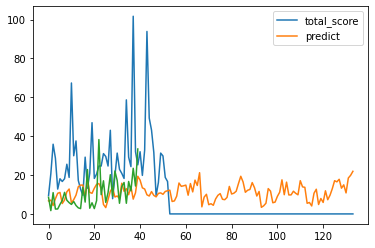

In [350]:
y_validate.drop(columns='index').plot()
y_train.plot()

<AxesSubplot:>

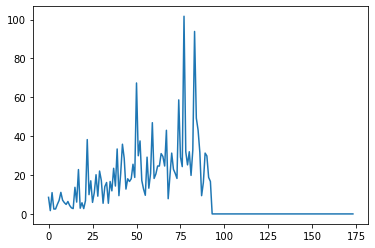

In [351]:
seinfeld.total_score.plot()

In [352]:
seinfeld_prepped.airdate = pd.to_datetime(seinfeld_prepped.airdate)
x=seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score']).set_index('airdate')
x_train = seinfeld_prepped.drop(columns=['plot','quotability','laughs','total_score'])[seinfeld_prepped.total_score > 0].set_index('airdate')
y_train = seinfeld_prepped.total_score[seinfeld_prepped.total_score > 0]
regr = MLPRegressor( max_iter=750,solver= 'lbfgs').fit(x_train,y_train)
mlp_predictions=pd.DataFrame(regr.predict(x),columns=['predict'])
y_mlp=pd.concat([y_train,mlp_predictions],axis=1)

<AxesSubplot:>

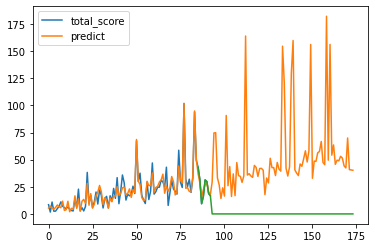

In [353]:
y_mlp.plot()
seinfeld[seinfeld.season_y > 5].total_score.plot()


In [354]:
seinfeld_prepped.corr()

,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,season_y,episodeno,"writers_Alec Berg, Jeff Schaffer","writers_Alec Berg, Jeff Schaffer, David Mandel",...,"writers_Tom Gammill, Max Pross","writers_Tom Gammill, Max Pross and Larry David","writers_Tom Gammill, Max Pross and Larry David, Jerry Seinfeld",writers_Tom Leopold,director_Art Wolff,director_David Owen Trainor,director_David Steinberg,director_Jason Alexander,director_Joshua White,director_Tom Cherones
plot,1.000000,0.386734,0.362707,0.573158,0.373140,-0.366608,0.257786,-0.000114,0.032428,NaN,...,-0.051224,NaN,-0.104652,-0.051351,0.032428,NaN,-0.051351,-0.104652,-0.104652,-0.003069
quotability,0.386734,1.000000,0.533961,0.652910,0.413787,-0.382166,0.525411,0.296171,0.003911,NaN,...,0.085709,NaN,0.059872,-0.153587,0.003911,NaN,-0.153587,0.003911,0.003911,0.034809
laughs,0.362707,0.533961,1.000000,0.904011,0.529911,-0.473255,0.555470,0.343825,0.098491,NaN,...,0.004719,NaN,0.263271,-0.111609,-0.115112,-0.163936,-0.098593,-0.041877,-0.109009,0.081009
total_score,0.573158,0.652910,0.904011,1.000000,0.219621,-0.153522,-0.375651,0.028441,-0.113348,-0.074164,...,-0.017484,-0.052290,0.039787,-0.023473,-0.012713,-0.074164,-0.008365,0.002835,-0.020487,0.573521
imdb_rating,0.373140,0.413787,0.529911,0.219621,1.000000,-0.956025,0.225811,0.165351,0.045695,0.021098,...,-0.023232,0.106660,-0.003481,-0.096063,-0.131979,-0.004938,-0.017956,-0.058552,0.051589,-0.106283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
director_David Owen Trainor,NaN,NaN,-0.163936,-0.074164,-0.004938,-0.001307,0.069013,-0.003760,-0.025184,-0.011628,...,-0.026627,-0.008198,-0.008198,-0.011628,-0.008198,1.000000,-0.011628,-0.008198,-0.008198,-0.099479
director_David Steinberg,-0.051351,-0.153587,-0.098593,-0.008365,-0.017956,0.021429,-0.120094,-0.099506,-0.025184,-0.011628,...,-0.026627,-0.008198,-0.008198,-0.011628,-0.008198,-0.011628,1.000000,-0.008198,-0.008198,-0.099479
director_Jason Alexander,-0.104652,0.003911,-0.041877,0.002835,-0.058552,0.082283,-0.084674,0.098609,-0.017756,-0.008198,...,-0.018774,-0.005780,-0.005780,-0.008198,-0.005780,-0.008198,-0.008198,1.000000,-0.005780,-0.070139
director_Joshua White,-0.104652,0.003911,-0.109009,-0.020487,0.051589,-0.070385,-0.084674,-0.070158,-0.017756,-0.008198,...,-0.018774,-0.005780,-0.005780,-0.008198,-0.005780,-0.008198,-0.008198,-0.005780,1.000000,-0.070139


In [355]:
grouped_scripts.Character.value_counts()/len(grouped_scripts.Character.sum())

SEID    Character 
S01E00  JERRY         0.540230
        GEORGE        0.402299
        KESSLER       0.114943
        LAURA         0.086207
        CLAIRE        0.040230
                        ...   
S09E23  PROSTITUTE    0.005747
        PUDDY         0.005747
        SECRETARY     0.005747
        STRANGER      0.005747
        SUSAN         0.005747
Name: Character, Length: 2634, dtype: float64

In [356]:
scripts['line']=scripts.Character.str.strip() +': ' + scripts.Dialogue.str.strip()

In [399]:
seinfeld['script'] = scripts.groupby('SEID').line
seinfeld.script = seinfeld.script.astype(str)

In [415]:
seinfeld.script = seinfeld.script.str.replace(r"(S\d+E\d+|,\s\d*\s{2,}|Name:.*)|\(\'|(?<=\n)\d+","")

In [416]:
seinfeld

,title,plot,quotability,laughs,total_score,imdb_rating,imdb_rank,notes,season_x,episode,season_y,episodeno,airdate,writers,director,seid,script
0,good_news_bad_news,4.0,7.0,7.0,8.521739,7.6,166.0,2nd button joke,1.0,1.0,1.0,0.0,"July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00,'JERRY: Do you know what this is all about? Do...
1,male_unbonding,3.0,6.5,2.0,1.695652,7.3,173.0,Kramer's pizza idea,1.0,2.0,1.0,3.0,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03,"'JERRY: So, Im on line at the supermarket. Two..."
2,the_stakeout,4.0,7.0,9.0,10.956522,7.7,160.0,Art Vandelay first appearance,1.0,3.0,1.0,1.0,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01,"'JERRY: So I move into the centre lane, now I ..."
3,the_robbery,3.0,3.5,5.5,2.510870,7.6,166.0,NaN,1.0,4.0,1.0,2.0,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02,'JERRY: Most men like working on things. Tools...
4,the_stock_tip,3.0,3.0,6.5,2.543478,7.5,168.0,NaN,1.0,5.0,1.0,4.0,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04,'JERRY: Went out to dinner the other night. Ch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,the_bookstore,NaN,NaN,NaN,0.000000,8.2,98.0,NaN,9.0,17.0,9.0,17.0,"April 9, 1998",Spike Feresten,Andy Ackerman,S09E17,'GEORGE: I read somewhere that this Brentano's...
170,the_frogger,NaN,NaN,NaN,0.000000,8.7,24.0,NaN,9.0,18.0,9.0,18.0,"April 23, 1998","Gregg Kavet, Andy Robin",Andy Ackerman,S09E18,'ALL: Happy birthday to you.\n ...
171,the_maid,NaN,NaN,NaN,0.000000,8.0,135.0,NaN,9.0,19.0,9.0,19.0,"April 30, 1998","Alec Berg, David Mandel, Jeff Schaffer",Andy Ackerman,S09E19,'JERRY: Cup of tea with lemon.\n ...
172,the_puerto_rican_day,NaN,NaN,NaN,0.000000,7.9,149.0,NaN,9.0,20.0,9.0,20.0,"May 7, 1998","Alec Berg, Jennifer Crittenden, Spike Feresten...",Andy Ackerman,S09E20,"'GEORGE: Man, I'm starving.\n ELAINE: How c..."
